# Assignemnt 2
*** Model solution:***
## Problem 3

10 points total:
    - 2 points for using the simplejson library to import the data into an x-coordinate array and a y-coordinate array.
    - 4 points for completing the least-squares fit. 
    - 2 points for computing the moments
    - 2 points for plotting the data with the fitted curve.

In [1]:
import simplejson
f=open('../stats/asst2.data.txt','r')
[xc,yc] = simplejson.load(f)


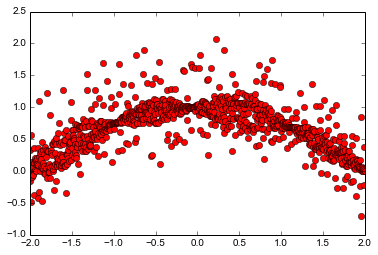

In [2]:
from matplotlib import *
import matplotlib.pyplot as plt
%matplotlib inline 
## the above forces figures to stay in the browser window. 

## what we're trying to fit...
plt.plot(xc,yc, 'ro')
plt.show()

Coefficients: [[ 1.02253152 -0.37455433 -0.25681057  0.64777986 -0.20250521  0.05101832]]


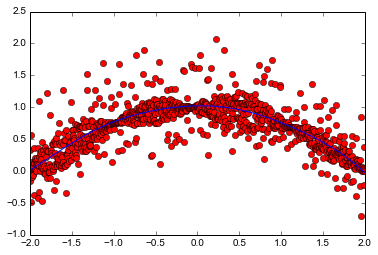

In [3]:
## we grab the code from examples/least-squares.sketch

from numpy import matrix
from numpy import linalg
from math import *

## function array.
## 1, x, x^2, sin(x), sin(2x), sin(3x)
fA=[lambda x: 1.0, lambda x: x, lambda x: x**2, lambda x: sin(x), lambda x: sin(2*x), lambda x: sin(3*x)]

## this matrix is where we put the data on the functions f_1, ..., f_6
A = matrix([[ fA[j](xc[i]) for i in range(len(xc))] for j in range(len(fA))]).T

## vector of coefficients for the fit.
avec = ((A.T*A).I)*(A.T)*(matrix(yc).T)
print("Coefficients: "+str(avec.T))
plt.plot(xc, yc, 'ro')
fity = [ sum([avec[j,0]*(fA[j](xc[i])) for j in range(len(avec))]) for i in range(len(xc)) ]
plt.plot(xc, fity, 'b-')

plt.show()

In [4]:
## Let's make the fitted curve a callable function
fitc = lambda x : sum([ avec[j,0]*(fA[j](x)) for j in range(len(avec)) ])
print "1st (fitted) moment of yc: ", sum( [ yc[i] -  fitc(xc[i] )    for i in range(len(yc)) ])/float(len(yc))
print "2nd (fitted) moment of yc: ", sum( [ (yc[i] - fitc(xc[i]))**2 for i in range(len(yc)) ] )/float(len(yc)) 
print "3nd (fitted) moment of yc: ", sum( [ (yc[i] - fitc(xc[i]))**3 for i in range(len(yc)) ] )/float(len(yc)) 
print "4th (fitted) moment of yc: ", sum( [ (yc[i] - fitc(xc[i]))**4 for i in range(len(yc)) ] )/float(len(yc)) 


1st (fitted) moment of yc:  1.58354579449e-15
2nd (fitted) moment of yc:  0.057184259054
3nd (fitted) moment of yc:  0.0120039566624
4th (fitted) moment of yc:  0.0218921336748
